# Calculate and Plot Phasor Plots

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import napari
from PhasorPy import phasor, phasor_plot, rgb_coloring, phasor_circle, histogram_filtering
from matplotlib import colors

## Make Synthetic FLIM data

In [6]:
def monoexp(x, a, b):
    import numpy as np
    return a * np.exp(-b*x)

In [114]:
laser_frequency = 60 # MHz
total_time_points = 270
laser_time_window = 1 / (laser_frequency * 10**6)
laser_time_window_ns = laser_time_window * 10**9
laser_time_window_ns
time_step = laser_time_window_ns / total_time_points # ns
time_step
array = np.arange(0, total_time_points)
time_array = array * time_step

In [115]:
a = 1
b = 0.1 # ns

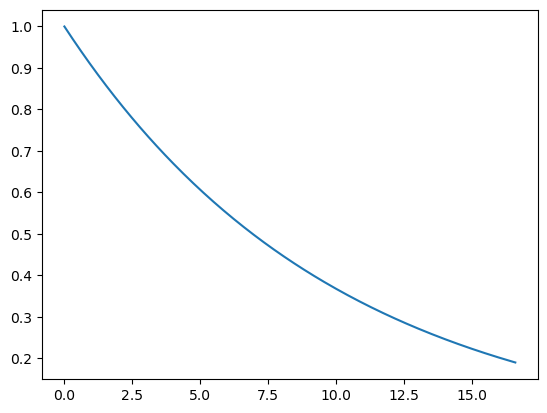

In [116]:
plt.plot(time_array, monoexp(time_array, a, b))

In [117]:
intensity = monoexp(time_array, a, b)
flim_data_stack = np.repeat(intensity[:, np.newaxis], 25, axis=1).reshape(total_time_points, 5, 5)

## FFT

In [118]:
flim_data_fft = np.fft.fft(flim_data_stack, axis=0)

In [119]:
harmonic = 1

In [124]:
g = flim_data_fft[harmonic].real
g /= -flim_data_fft[0].real
s = flim_data_fft[harmonic].imag
s /= -flim_data_fft[0].real   

In [125]:
(g - 0.5)**2 + s**2

array([[0.25052435, 0.25052435, 0.25052435, 0.25052435, 0.25052435],
       [0.25052435, 0.25052435, 0.25052435, 0.25052435, 0.25052435],
       [0.25052435, 0.25052435, 0.25052435, 0.25052435, 0.25052435],
       [0.25052435, 0.25052435, 0.25052435, 0.25052435, 0.25052435],
       [0.25052435, 0.25052435, 0.25052435, 0.25052435, 0.25052435]])

In [126]:
s

array([[0.00187428, 0.00187428, 0.00187428, 0.00187428, 0.00187428],
       [0.00187428, 0.00187428, 0.00187428, 0.00187428, 0.00187428],
       [0.00187428, 0.00187428, 0.00187428, 0.00187428, 0.00187428],
       [0.00187428, 0.00187428, 0.00187428, 0.00187428, 0.00187428],
       [0.00187428, 0.00187428, 0.00187428, 0.00187428, 0.00187428]])

In [129]:
1-g

array([[1.00052056, 1.00052056, 1.00052056, 1.00052056, 1.00052056],
       [1.00052056, 1.00052056, 1.00052056, 1.00052056, 1.00052056],
       [1.00052056, 1.00052056, 1.00052056, 1.00052056, 1.00052056],
       [1.00052056, 1.00052056, 1.00052056, 1.00052056, 1.00052056],
       [1.00052056, 1.00052056, 1.00052056, 1.00052056, 1.00052056]])

In [80]:
ic = 0

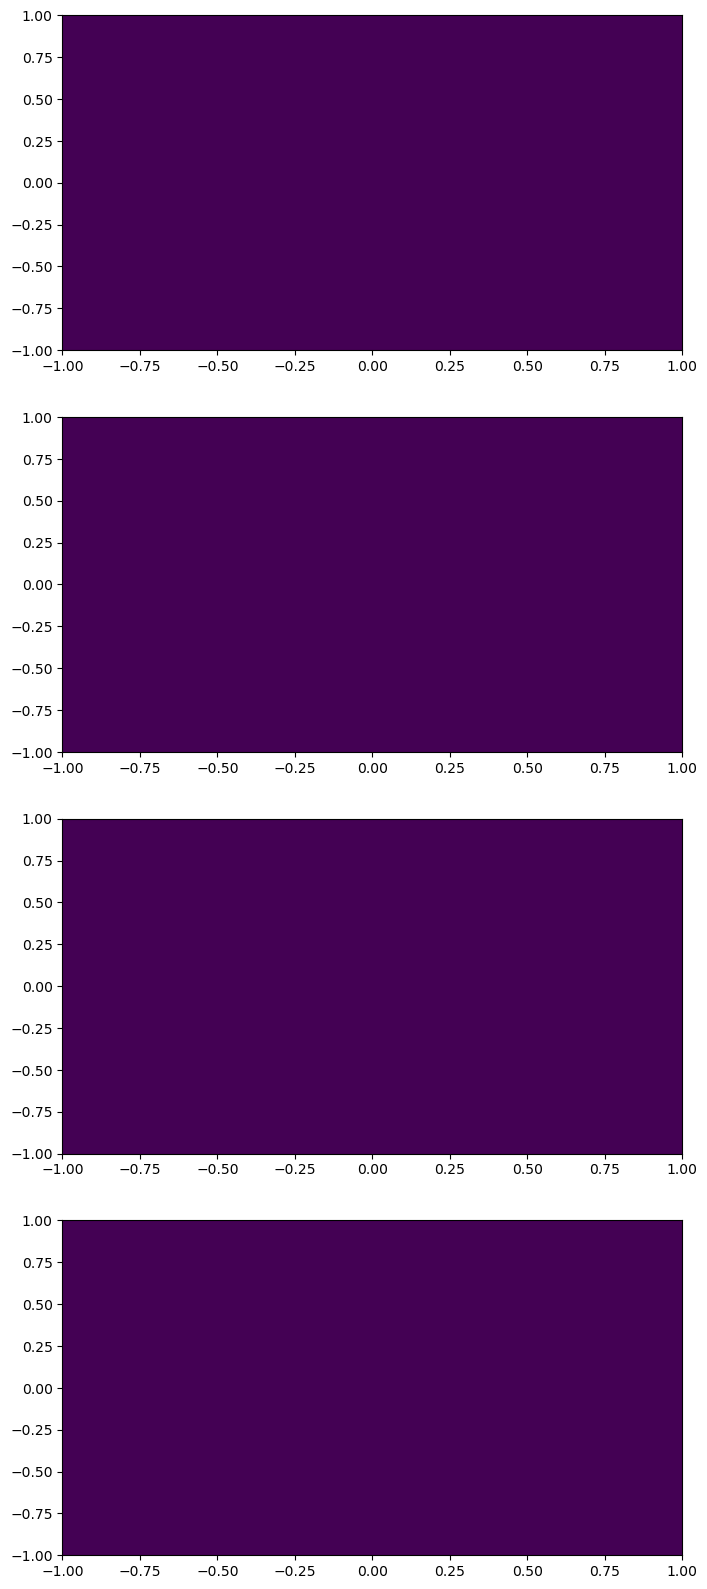

In [81]:
n_harmonics = 4
fig, ax = plt.subplots(n_harmonics, 1, figsize=(8, n_harmonics*5))
for i in range(n_harmonics):
    g, s, md, ph, dc = phasor(flim_data_stack, harmonic = i+1)
    # x, y = histogram_filtering(dc, g, s, ic)
    x = np.ravel(g)
    y = np.ravel(s)
    ax[i].hist2d(x, y, bins=256, norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]], )
    # phasor_circle(ax[i])
    
    #, range = [[-1, 1], [-1, 1]])
    # ax[i].hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])

    # # ax[i].scatter(x,y,marker='.', s=4)
    # ax[i].hist2d(x, y, bins=256)
    

In [12]:
# fig, ax = plt.subplots()
# x, y = histogram_filtering(dc, g, s, ic)
# ax.hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])
# ax.set_title('Phasor')
# phasor_circle(ax)